# Recommendation system (1/2)

Here below is a recommendation system in which a user can enter a danish ZIP code, and then there are printed two recommended lists for said user. The first list shows the user the ten products which have the current highest percentage discount within the user's area, and the second list displays the ten products on which the most amount of money is being saved by purchasing them (also within the user's area). The lists both show the products name and in which store within the area code a person can buy the product. Both lists show the current and previous price of the product, the first list display's the discount and the second one money saved.

This type of recommendation system would be considered 

In [ ]:
## import requests
import pandas as pd

# --- 1. API Token Setup ---
token = ""
headers = {
    "Authorization": f"Bearer {token}"
}

# --- 2. Load Danish ZIP codes ---
zip_codes = []
with open('DK.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) > 1:
            zip_code = parts[1]
            zip_codes.append(zip_code)

# --- 3. User selects a ZIP code ---
print("\nAvailable ZIP codes (sample):", ", ".join(zip_codes[:20]), "...")
selected_zip = input("\nEnter a Danish ZIP code to search stores in: ").strip()

if selected_zip not in zip_codes:
    print("Invalid ZIP code. Exiting.")
    exit()
# --- 4. Fetch food waste data ---
def fetch_food_waste(zip_code):
    url = f"https://api.sallinggroup.com/v1/food-waste/?zip={zip_code}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

food_waste_data = fetch_food_waste(selected_zip)

# --- 5. Build DataFrame ---
if food_waste_data:
    products = []
    for store in food_waste_data:
        store_name = store.get('store', {}).get('name', 'Unknown Store')
        for item in store.get('clearances', []):
            products.append({
                'description': item.get('product', {}).get('description', ''),
                'category': item.get('product', {}).get('categories', {}).get('en', 'Unknown'),
                'new_price': item.get('offer', {}).get('newPrice', None),
                'original_price': item.get('offer', {}).get('originalPrice', None),
                'percent_discount': item.get('offer', {}).get('percentDiscount', None),
                'stock': item.get('offer', {}).get('stock', None),
                'start_time': item.get('offer', {}).get('startTime', None),
                'end_time': item.get('offer', {}).get('endTime', None),
                'ean': item.get('product', {}).get('ean', None),
                'image_url': item.get('product', {}).get('image', None),
                'store': store_name
            })

    df = pd.DataFrame(products)

    # --- 6. Calculate money saved ---
    df['money_saved'] = df['original_price'] - df['new_price']

    # --- 7. Create recommendation lists ---
    top_percent_discount = df.sort_values(by='percent_discount', ascending=False).head(10)
    top_money_saved = df.sort_values(by='money_saved', ascending=False).head(10)

    # --- 8. ONLY Print the two top 10 lists ---
    print("\n🏆 Top Products by Highest Percentage Discount:")
    for idx, row in top_percent_discount.iterrows():
        print(f"- {row['description']} ({row['store']}): {row['percent_discount']:.1f}% off, now {row['new_price']} DKK (was {row['original_price']} DKK)")

    print("\n💰 Top Products by Most Money Saved:")
    for idx, row in top_money_saved.iterrows():
        print(f"- {row['description']} ({row['store']}): Saved {row['money_saved']:.2f} DKK, now {row['new_price']} DKK (was {row['original_price']} DKK)")

else:
    print("No data fetched.")


Available ZIP codes (sample): 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069 ...



Enter a Danish ZIP code to search stores in:  2400



🏆 Top Products by Highest Percentage Discount:
- MADLAVNING 15% AMA (Netto Tuborgvej): 78.5% off, now 3 DKK (was 13.95 DKK)
- BACON POSTEJ STRYHNS (Netto Tomsgårdsvej): 73.3% off, now 8 DKK (was 29.95 DKK)
- SOLSIKKE KOHBERG (Netto Tomsgårdsvej): 63.5% off, now 8 DKK (was 21.95 DKK)
- BACON POSTEJ STRYHNS (Netto Tuborgvej): 63.3% off, now 11 DKK (was 29.95 DKK)
- JAVISST PÅGEN (Netto Tuborgvej): 58.2% off, now 10 DKK (was 23.95 DKK)
- JAVISST PÅGEN (Netto Lygten): 58.2% off, now 10 DKK (was 23.95 DKK)
- ORGINAL SKIVER LEERDAMMER (Netto Tuborgvej): 57.5% off, now 14 DKK (was 32.95 DKK)
- RØD I SKIVER PRIMA DONNA (Netto Tuborgvej): 57.1% off, now 15 DKK (was 34.95 DKK)
- JUICE MULTIFRUGT FRUGTKOMPAGNIET (Netto Tomsgårdsvej): 56.4% off, now 10 DKK (was 22.95 DKK)
- RØGET MØRBRAD SMAGEN AARHU (Netto Tomsgårdsvej): 55.4% off, now 8 DKK (was 17.95 DKK)

💰 Top Products by Most Money Saved:
- SVINEMØRBRAD VELSMAG (Netto Tomsgårdsvej): Saved 65.95 DKK, now 61 DKK (was 126.95 DKK)
- GULD 45+ MA

# Recommendation system with two lists for each ctegory
Recommendation system for the highest discount and most money saved per category in a chosen area code. (Max three products per category).

In [ ]:
## import requests
import pandas as pd

# --- 1. API Token Setup ---
token = ""
headers = {
    "Authorization": f"Bearer {token}"
}

# --- 2. Load Danish ZIP codes ---
zip_codes = []
with open('DK.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) > 1:
            zip_code = parts[1]
            zip_codes.append(zip_code)

# --- 3. User selects a ZIP code ---
print("\nAvailable ZIP codes (sample):", ", ".join(zip_codes[:20]), "...")
selected_zip = input("\nEnter a Danish ZIP code to search stores in: ").strip()

if selected_zip not in zip_codes:
    print("Invalid ZIP code. Exiting.")
    exit()

# --- 4. Fetch food waste data ---
def fetch_food_waste(zip_code):
    url = f"https://api.sallinggroup.com/v1/food-waste/?zip={zip_code}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

food_waste_data = fetch_food_waste(selected_zip)

# --- 5. Build DataFrame ---
if food_waste_data:
    products = []
    for store in food_waste_data:
        store_name = store.get('store', {}).get('name', 'Unknown Store')
        for item in store.get('clearances', []):
            products.append({
                'description': item.get('product', {}).get('description', ''),
                'category': item.get('product', {}).get('categories', {}).get('en', 'Unknown'),
                'new_price': item.get('offer', {}).get('newPrice', None),
                'original_price': item.get('offer', {}).get('originalPrice', None),
                'percent_discount': item.get('offer', {}).get('percentDiscount', None),
                'stock': item.get('offer', {}).get('stock', None),
                'start_time': item.get('offer', {}).get('startTime', None),
                'end_time': item.get('offer', {}).get('endTime', None),
                'ean': item.get('product', {}).get('ean', None),
                'image_url': item.get('product', {}).get('image', None),
                'store': store_name
            })

    df = pd.DataFrame(products)

    # --- 6. Calculate money saved ---
    df['money_saved'] = df['original_price'] - df['new_price']

    # --- 7. Extract first category ---
    df['first_category'] = df['category'].apply(lambda x: x.split('>')[0] if isinstance(x, str) and '>' in x else x)

    # --- 8. For each category, print Top 3 products ---
    categories = df['first_category'].dropna().unique()

    for cat in categories:
        df_cat = df[df['first_category'] == cat]

        top_percent_discount = df_cat.sort_values(by='percent_discount', ascending=False).head(3)
        top_money_saved = df_cat.sort_values(by='money_saved', ascending=False).head(3)

        print(f"\n📚 Category: {cat}")

        print("\n🏆 Top products by Highest Percentage Discount:")
        for idx, row in top_percent_discount.iterrows():
            print(f"- {row['description']} ({row['store']}): {row['percent_discount']:.1f}% off, now {row['new_price']} DKK (was {row['original_price']} DKK)")

        print("\n💰 Top products by Most Money Saved:")
        for idx, row in top_money_saved.iterrows():
            print(f"- {row['description']} ({row['store']}): Saved {row['money_saved']:.2f} DKK, now {row['new_price']} DKK (was {row['original_price']} DKK)")

else:
    print("No data fetched.")

# Pick a area code -> Pick a store -> Get a list of discounted products

Code which allows a user to pick an area code, and then to pick a store within that area code. Then they get a list of the products which are on sale within the store, recommending first the products which have the highest discount/allow you to save the most money.

In [ ]:
import requests
import pandas as pd

# --- 1. API Token Setup ---
token = ""
headers = {
    "Authorization": f"Bearer {token}"
}

# --- 2. Load Danish ZIP codes ---
zip_codes = []
with open('DK.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) > 1:
            zip_code = parts[1]
            zip_codes.append(zip_code)

# --- 3. User selects a ZIP code ---
print("\nAvailable ZIP codes (sample):", ", ".join(zip_codes[:20]), "...")
selected_zip = input("\nEnter a Danish ZIP code to search stores in: ").strip()

if selected_zip not in zip_codes:
    print("Invalid ZIP code. Exiting.")
    exit()

# --- 4. Fetch food waste data ---
def fetch_food_waste(zip_code):
    url = f"https://api.sallinggroup.com/v1/food-waste/?zip={zip_code}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

food_waste_data = fetch_food_waste(selected_zip)

# --- 5. Let user choose a store ---
if food_waste_data:
    store_names = []
    store_lookup = {}
    for i, store in enumerate(food_waste_data):
        store_name = store.get('store', {}).get('name', f"Store #{i}")
        full_name = f"{store_name} - {store.get('store', {}).get('address', {}).get('street', '')}"
        store_names.append(full_name)
        store_lookup[str(i)] = store

    print("\nStores found in this area:")
    for i, name in enumerate(store_names):
        print(f"{i}: {name}")

    selected_index = input("\nSelect a store by number: ").strip()
    if selected_index not in store_lookup:
        print("Invalid selection. Exiting.")
        exit()

    selected_store = store_lookup[selected_index]

    # --- 6. Build DataFrame for that store ---
    store_name = selected_store.get('store', {}).get('name', 'Unknown Store')
    products = []
    for item in selected_store.get('clearances', []):
        products.append({
            'description': item.get('product', {}).get('description', ''),
            'category': item.get('product', {}).get('categories', {}).get('en', 'Unknown'),
            'new_price': item.get('offer', {}).get('newPrice', None),
            'original_price': item.get('offer', {}).get('originalPrice', None),
            'percent_discount': item.get('offer', {}).get('percentDiscount', None),
            'stock': item.get('offer', {}).get('stock', None),
            'start_time': item.get('offer', {}).get('startTime', None),
            'end_time': item.get('offer', {}).get('endTime', None),
            'ean': item.get('product', {}).get('ean', None),
            'image_url': item.get('product', {}).get('image', None)
        })

    df = pd.DataFrame(products)

    # --- 7. Calculate money saved ---
    df['money_saved'] = df['original_price'] - df['new_price']

    # --- 8. Create and print recommendation lists ---
    top_percent_discount = df.sort_values(by='percent_discount', ascending=False).head(10)
    top_money_saved = df.sort_values(by='money_saved', ascending=False).head(10)

    print(f"\n📍 Showing products for store: {store_name}")

    print("\n🏆 Top Products by Highest Percentage Discount:")
    for idx, row in top_percent_discount.iterrows():
        print(f"- {row['description']}: {row['percent_discount']:.1f}% off, now {row['new_price']} DKK (was {row['original_price']} DKK)")

    print("\n💰 Top Products by Most Money Saved:")
    for idx, row in top_money_saved.iterrows():
        print(f"- {row['description']}: Saved {row['money_saved']:.2f} DKK, now {row['new_price']} DKK (was {row['original_price']} DKK)")

else:
    print("No data fetched.")


Available ZIP codes (sample): 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069 ...



Enter a Danish ZIP code to search stores in:  2400



Stores found in this area:
0: Netto Emdrupvej - Emdrupvej 107
1: Netto Frederikssundsvej 52 - Frederikssundsvej 52 ST.
2: Netto Utterslevvej - Utterslevvej 11
3: Netto Tomsgårdsvej - Tomsgårdsvej 24
4: Netto Lygten - Lygten 53
5: Netto Stærevej - Stærevej 74
6: Netto Tuborgvej - Tuborgvej 239



Select a store by number:  2



📍 Showing products for store: Netto Utterslevvej

🏆 Top Products by Highest Percentage Discount:
- FRANSK LEVERPOSTEJ STRYHNS: 49.9% off, now 15 DKK (was 29.95 DKK)
- RULLEPØLSE SMAGEN AF AARHUS: 49.9% off, now 9 DKK (was 17.95 DKK)
- BURGUNDERSKINKE MINIMUM: 49.8% off, now 8 DKK (was 15.95 DKK)
- HAMBURGERRYG PÅLÆKKER: 49.8% off, now 8 DKK (was 15.95 DKK)
- FANØ BRØD SIGNATURBRØD: 49.0% off, now 13 DKK (was 25.5 DKK)
- DET GODE SOL RUGBRØD SCHULSTAD: 49.0% off, now 13 DKK (was 25.5 DKK)
- MULTIKERNE BOLLER SCHULSTAD: 48.0% off, now 13 DKK (was 25.0 DKK)
- WRAP M/KYLLING/KARRY NÆMT: 47.7% off, now 12 DKK (was 22.95 DKK)
- KYLLING M CHILI K-SALAT: 41.7% off, now 7 DKK (was 12.0 DKK)
- MEDISTER VELSMAG: 39.9% off, now 21 DKK (was 34.95 DKK)

💰 Top Products by Most Money Saved:
- GULD 45+ MAMMEN: Saved 27.00 DKK, now 82 DKK (was 109.0 DKK)
- BURGERBOOST DANISH CROWN: Saved 15.95 DKK, now 29 DKK (was 44.95 DKK)
- FRANSK LEVERPOSTEJ STRYHNS: Saved 14.95 DKK, now 15 DKK (was 29.95 DKK)
- ME

In [46]:
!pip install openai


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Type in danish product that's on sale -> Get an AI recipe which contains the product

Code which allow a user to manually type in a recommended product that is on sale, and then the AI creates a recipe for the user which contains that particular product.

In [ ]:
import openai
import os

# Set your actual OpenAI API key here
client = openai.OpenAI(api_key="")

def generate_recipe_from_danish_ingredient(ingredient_dk):
    prompt = f"""
Create a detailed recipe in ENGLISH that uses the following Danish ingredient: "{ingredient_dk}".
Include:
- A creative recipe title
- A short 1-2 sentence description
- A clear list of ingredients
- Step-by-step instructions
"""

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a professional chef that creates creative and easy-to-follow recipes."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=700
    )

    return response.choices[0].message.content

# Get user input
ingredient = input("Enter a Danish ingredient from the food waste list: ")
recipe = generate_recipe_from_danish_ingredient(ingredient)

# Print the result
print("\nHere is your recipe:\n")
print(recipe)

Enter a Danish ingredient from the food waste list:  GULD 45+ MAMMEN



Here is your recipe:

**Golden Cheese Tartlets with GULD 45+ MAMMEN**

Indulge in these delicious and creamy cheese tartlets made with the rich and flavorful GULD 45+ MAMMEN cheese from Denmark.

**Ingredients:**
- 1 sheet of puff pastry, thawed
- 200g GULD 45+ MAMMEN cheese, grated
- 1/2 cup heavy cream
- 1 egg
- Salt and pepper to taste
- Fresh herbs for garnish (optional)

**Instructions:**

1. Preheat your oven to 200°C (400°F) and grease a muffin tin.

2. Roll out the puff pastry on a floured surface and cut it into squares that fit the muffin tin cavities. Gently press the pastry squares into the tin.

3. In a mixing bowl, combine the grated GULD 45+ MAMMEN cheese, heavy cream, egg, salt, and pepper. Mix well until everything is evenly combined.

4. Spoon the cheese mixture into each puff pastry-lined muffin tin, filling them almost to the top.

5. Bake the tartlets in the preheated oven for about 15-20 minutes, or until the pastry is golden brown and the cheese mixture is set.


# Total products on sale for a chosen ZIP code.

In [ ]:
# --- 1. API Token Setup ---
token = ""  # Replace with your actual token
headers = {
    "Authorization": f"Bearer {token}"
}

# --- 2. Load Danish ZIP codes ---
zip_codes = []
with open('DK.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) > 1:
            zip_code = parts[1]
            zip_codes.append(zip_code)

# --- 3. User selects a ZIP code ---
print("\nAvailable ZIP codes (sample):", ", ".join(zip_codes[:20]), "...")
selected_zip = input("\nEnter a Danish ZIP code to search stores in: ").strip()

if selected_zip not in zip_codes:
    print("Invalid ZIP code. Exiting.")
    exit()

# --- 4. Fetch food waste data ---
def fetch_food_waste(zip_code):
    url = f"https://api.sallinggroup.com/v1/food-waste/?zip={zip_code}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

food_waste_data = fetch_food_waste(selected_zip)

# --- 5. Collect all products across all stores ---
if food_waste_data:
    all_products = []
    for store in food_waste_data:
        for item in store.get('clearances', []):
            all_products.append({
                'store': store.get('store', {}).get('name', 'Unknown Store'),
                'description': item.get('product', {}).get('description', ''),
                'category': item.get('product', {}).get('categories', {}).get('en', 'Unknown'),
                'new_price': item.get('offer', {}).get('newPrice', None),
                'original_price': item.get('offer', {}).get('originalPrice', None),
                'percent_discount': item.get('offer', {}).get('percentDiscount', None)
            })

    # Create DataFrame
    df = pd.DataFrame(all_products)

    # Print summary
    print(f"\n🔍 Total products found in ZIP code {selected_zip}: {len(df)}")

    # Print each product
    print("\n📦 All Products:")
    for idx, row in df.iterrows():
        print(f"- {row['description']} ({row['store']}) – now {row['new_price']} DKK")

else:
    print("No data fetched.")


Available ZIP codes (sample): 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069 ...



Enter a Danish ZIP code to search stores in:  2400



🔍 Total products found in ZIP code 2400: 221

📦 All Products:
- RØGET MØRBRAD PREMIEUR (Netto Emdrupvej) – now 21 DKK
- SKOVBÆR DRIK ACTIMEL (Netto Emdrupvej) – now 12 DKK
- JORD/BANAN DRIK ACTIMEL (Netto Emdrupvej) – now 15 DKK
- KRABBESALAT K-SALAT (Netto Emdrupvej) – now 10 DKK
- ITALIENSK SALAT GRAASTEN (Netto Emdrupvej) – now 9 DKK
- RØGET MEDISTER 3-STJERNET (Netto Emdrupvej) – now 9 DKK
- OKSE STICKS HANEGAL ØKO (Netto Emdrupvej) – now 4 DKK
- HAMBURGERRYG PÅLÆKKER (Netto Emdrupvej) – now 8 DKK
- DET GODE GULEROD SCHULSTAD (Netto Emdrupvej) – now 11 DKK
- INNOCENT BLÅBÆR/SOL/ 900 ML +PANT (Netto Frederikssundsvej 52) – now 15 DKK
- KOTELETTER VELSMAG (Netto Frederikssundsvej 52) – now 37 DKK
- JUICE CITRON, LIME INNOCENT (Netto Frederikssundsvej 52) – now 15 DKK
- KERNERUGBRØD ØGO (Netto Frederikssundsvej 52) – now 12 DKK
- BACON-PEBER POSTEJ STRYHNS (Netto Frederikssundsvej 52) – now 14 DKK
- SVINEMØRBRAD VELSMAG (Netto Frederikssundsvej 52) – now 82 DKK
- MEDALJONER VELSMAG (

# Write in danish product from food waste API -> Get a recipe which contains the product (recipe written in danish)

In [ ]:
import openai
import os

# Set your actual OpenAI API key here
client = openai.OpenAI(api_key="sk-proj-")

def generate_recipe_from_danish_ingredient(ingredient_dk):
    prompt = f"""
Create a detailed recipe in ENGLISH that uses the following Danish ingredient: "{ingredient_dk}".
However, the ingredient list should be written in DANISH.
Include:
- A creative recipe title
- A short 1-2 sentence description
- A list of ingredients (in Danish)
- Step-by-step instructions (in English)
"""

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a professional chef that creates creative and easy-to-follow recipes."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=700
    )

    return response.choices[0].message.content

# Get user input
ingredient = input("Enter a Danish ingredient from the food waste list: ")
recipe = generate_recipe_from_danish_ingredient(ingredient)

# Print the result
print("\nHere is your recipe:\n")
print(recipe)

Enter a Danish ingredient from the food waste list:  GULD 45+ MAMMEN



Here is your recipe:

**Creative Recipe Title:** Guld 45+ Mammen Cheese Stuffed Chicken Breast

**Description:** This recipe features tender chicken breasts stuffed with creamy Guld 45+ Mammen cheese, creating a decadent and flavorful dish that is sure to impress your guests.

**Ingredienser:**
- 4 kyllingebryst
- 100g Guld 45+ Mammen ost
- 1 spsk olivenolie
- 1 tsk hvidløgspulver
- 1 tsk løgpulver
- Salt og peber efter smag

**Instructions:**
1. Preheat the oven to 200°C (400°F).
2. Using a sharp knife, carefully slice a pocket into each chicken breast, being careful not to cut all the way through.
3. In a small bowl, mix together Guld 45+ Mammen cheese, hvidløgspulver, løgpulver, salt, and pepper.
4. Stuff each chicken breast with the cheese mixture, ensuring it is evenly distributed.
5. Heat olive oil in an oven-safe skillet over medium-high heat.
6. Place the stuffed chicken breasts in the skillet and cook for 2-3 minutes on each side until golden brown.
7. Transfer the skillet to

# Exploratory data analysis

✅ Success with ZIP 2200
✅ Success with ZIP 2400
✅ Success with ZIP 2100
✅ Success with ZIP 2150
✅ Success with ZIP 2500
❌ Error fetching ZIP 2900: 429
❌ Error fetching ZIP 2300: 429

📊 Summary Statistics:
         new_price  original_price  percent_discount        stock
count  1224.000000     1224.000000       1224.000000  1224.000000
mean     15.551626       24.812165         36.699853     8.552129
std      11.334105       16.798911         12.700735    21.202803
min       3.000000        5.000000          6.670000     0.077553
25%       9.000000       15.950000         25.000000     2.000000
50%      12.000000       20.000000         35.870000     4.000000
75%      18.000000       29.950000         48.000000     8.000000
max     149.000000      179.000000         78.490000   385.000000

📦 Top Categories:
category
Bread And Cakes>Light Breads Dark Breads>Light Dark Buns                 75
Dairy And Cold Storage>Lunch Meats>Liver Paste Patee                     73
Dairy And Cold Storag

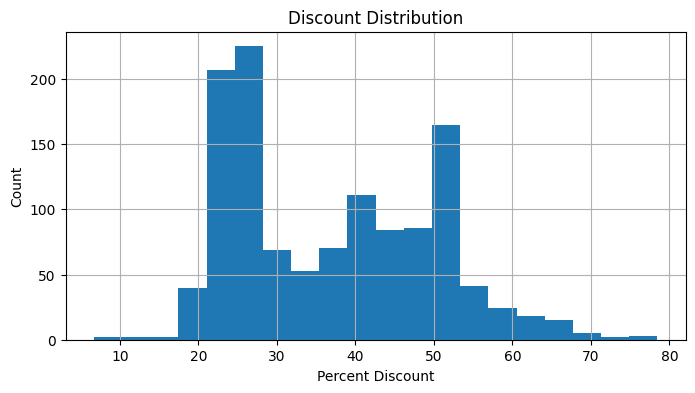

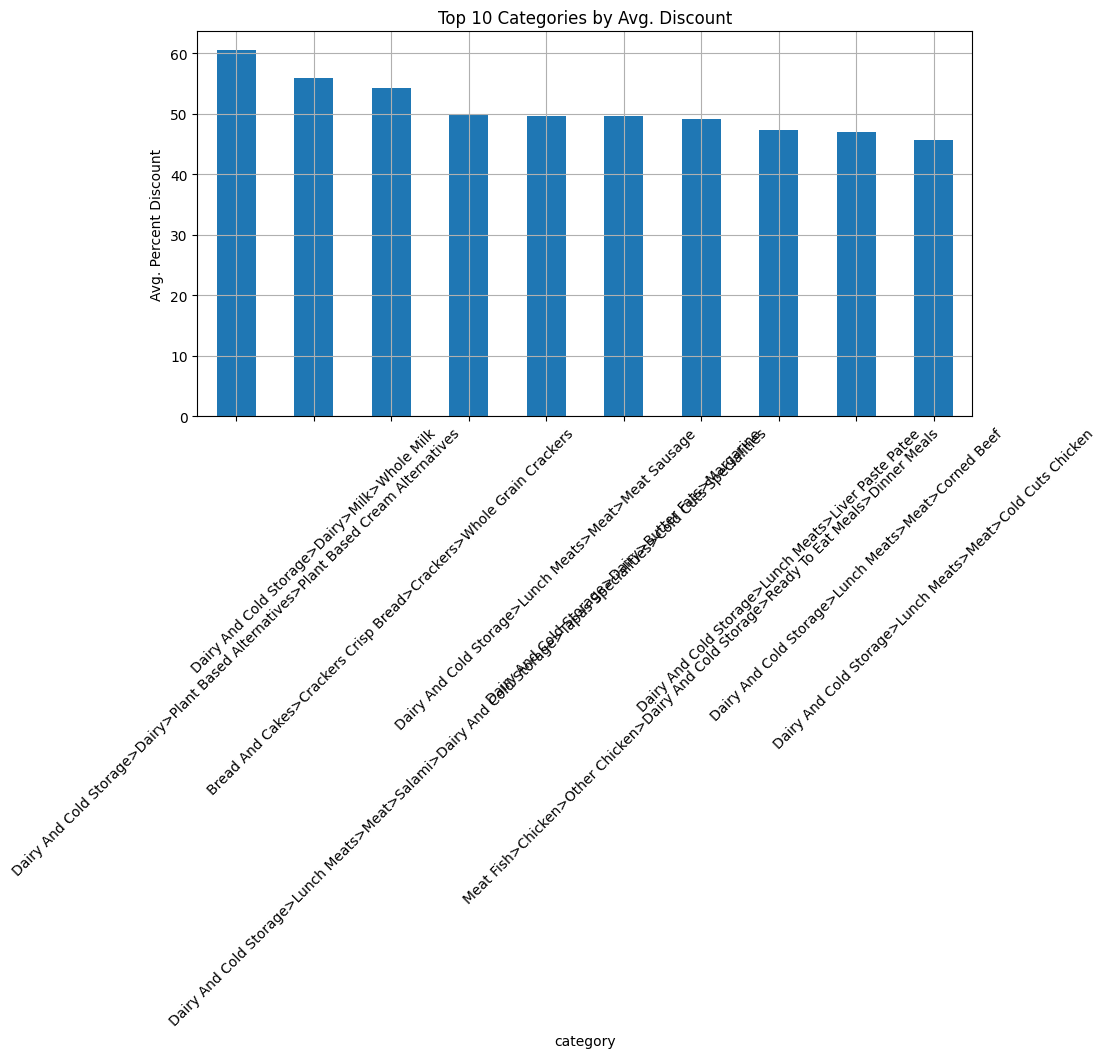

<Figure size 600x400 with 0 Axes>

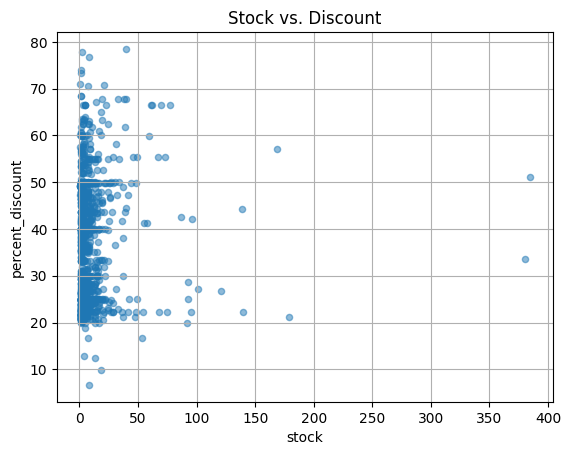


🏪 Average Discount Per Store:
store_name
føtex Nørrebro            44.883095
føtex Østerbro Centret    42.931774
Netto Emdrupvej           41.831667
føtex City Østerbro       39.781176
Netto Tomsgårdsvej        39.712051
Netto Blågårdsgade        39.266364
Netto Øbro                39.239643
Netto Hillerødgade        38.565385
Netto Nørrebrogade 170    38.363750
føtex Food Torveporten    37.920857
Name: percent_discount, dtype: float64


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from datetime import datetime

# --- 1. API Setup ---
token = ""  # 🔐 Insert your API token here
headers = {
    "Authorization": f"Bearer {token}"
}

# --- 2. Target ZIP Codes Only ---
target_zips = ['2200', '2400', '2100', '2150', '2500',]

# --- 3. Fetch Data for ZIPs ---
def fetch_food_waste(zip_code):
    url = f"https://api.sallinggroup.com/v1/food-waste/?zip={zip_code}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            print(f"✅ Success with ZIP {zip_code}")
            return data
        else:
            print(f"⚠️ Empty data for ZIP {zip_code}")
    else:
        print(f"❌ Error fetching ZIP {zip_code}: {response.status_code}")
    return []

all_data = []
for z in target_zips:
    all_data += fetch_food_waste(z)

# --- 4. Normalize & Clean Data ---
records = []
for store in all_data:
    store_info = store.get('store', {})
    coords = store_info.get('coordinates', [None, None])
    for item in store.get('clearances', []):
        offer = item.get('offer', {})
        product = item.get('product', {})
        records.append({
            "store_name": store_info.get("name"),
            "store_zip": store_info.get("address", {}).get("zip"),
            "store_street": store_info.get("address", {}).get("street"),
            "lat": coords[1],
            "lon": coords[0],
            "description": product.get("description"),
            "category": product.get("categories", {}).get("en"),
            "original_price": offer.get("originalPrice"),
            "new_price": offer.get("newPrice"),
            "percent_discount": offer.get("percentDiscount"),
            "stock": offer.get("stock"),
            "start_time": offer.get("startTime"),
            "end_time": offer.get("endTime")
        })

df = pd.DataFrame(records)

# --- 5. Clean Columns ---
df = df.dropna(subset=['description', 'new_price', 'original_price'])
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['money_saved'] = df['original_price'] - df['new_price']

# --- 6. Descriptive Stats ---
print("\n📊 Summary Statistics:")
print(df[['new_price', 'original_price', 'percent_discount', 'stock']].describe())
print("\n📦 Top Categories:")
print(df['category'].value_counts().head(10))

# --- 7. Visualizations ---

# Histogram of percent discount
plt.figure(figsize=(8, 4))
df['percent_discount'].hist(bins=20)
plt.title("Discount Distribution")
plt.xlabel("Percent Discount")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Top 10 categories by average discount
plt.figure(figsize=(10, 5))
df.groupby('category')['percent_discount'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Categories by Avg. Discount")
plt.ylabel("Avg. Percent Discount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Stock vs. percent discount
plt.figure(figsize=(6, 4))
df.plot.scatter(x='stock', y='percent_discount', alpha=0.5)
plt.title("Stock vs. Discount")
plt.grid(True)
plt.show()

# --- 8. Store-Level Averages ---
store_avg = df.groupby('store_name')['percent_discount'].mean().sort_values(ascending=False)
print("\n🏪 Average Discount Per Store:")
print(store_avg.head(10))



In [ ]:
import requests
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# --- 1. Set your API key ---
API_TOKEN = ""  # 🔐 Replace with your Salling Group API token

# --- 2. Get ZIP code input ---
zip_code = input("Enter a Danish ZIP code (e.g., 8000): ").strip()

# --- 3. Fetch food waste data from API ---
url = f"https://api.sallinggroup.com/v1/food-waste/?zip={zip_code}"
headers = {"Authorization": f"Bearer {API_TOKEN}"}
response = requests.get(url, headers=headers)

if response.status_code != 200:
    print(f"Error: Failed to fetch data for ZIP {zip_code} ({response.status_code})")
else:
    data = response.json()

    # --- 4. Extract store coordinates ---
    locations = []
    for store_data in data:
        store = store_data.get("store", {})
        coords = store.get("coordinates", [None, None])
        if coords and len(coords) == 2:
            lon, lat = coords
            store_name = store.get("name", "Unknown Store")
            store_address = store.get("address", {}).get("street", "Unknown Address")
            locations.append({
                "name": store_name,
                "address": store_address,
                "lat": lat,
                "lon": lon
            })

    if not locations:
        print(f"No stores found in ZIP {zip_code}.")
    else:
        # --- 5. Create and display the map inline ---
        first = locations[0]
        m = folium.Map(location=[first['lat'], first['lon']], zoom_start=13)
        marker_cluster = MarkerCluster().add_to(m)

        for loc in locations:
            folium.Marker(
                location=[loc['lat'], loc['lon']],
                popup=f"{loc['name']}<br>{loc['address']}",
                icon=folium.Icon(color="green", icon="shopping-cart", prefix="fa")
            ).add_to(marker_cluster)

        display(m)